<a href="https://colab.research.google.com/github/javier-jaime/Route-Recommender/blob/main/3PL_EDA_2021_MDD_May-26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA and Feature Engineering

## Data Preparation

Import necessary libraries

In [106]:
import pandas as pd
import numpy as np

from google.colab import drive
from google.colab import files

from sklearn.cluster import KMeans # Uncomment if required

In [107]:
# Mount Google Drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
# Read dataset from excel in Google Drive to Pandas Data Frame
data = pd.read_excel('drive/MyDrive/Colab Data/Hopewell 3PL Orig Data Dec 2021_Data set_MDD.xlsx', sheet_name='RawData')
print(data.shape)
data['Lean ID'] = data['Lean ID'].astype(int)
data.set_index('Lean ID', inplace=True)

(25692, 29)


In [109]:
data.head()

,Tender Date,First Pick Calculated Date,First Pick Location City,Last Drop Calculated Date,Last Drop Location Name,Last Drop Location Reference Number,Last Drop Location City,Last Drop State/Province,Total Distance (km),Weight (kg),...,Last Drop Original Plan Date Start,Last Drop Appt Start Date,Fiscal Period - Primary Date,Load Group,Shipper Load Number,Pieces,Density (pcf),First Pick Location Reference Number,Volume (cu ft),PRO Number
Lean ID,,,,,,,,,,,,,,,,,,,,,
103473910,12/31/2019 10:35,01/04/2020 00:44,BOLTON,01/13/2020 08:04,COSTCO LANGLEY DEPOT 076,10273118,LANGLEY,BC,4319.479296,18722.434543,...,01/13/2020 00:00,01/13/2020 07:30,1.0,ZA12-CUSTOMER,10160893,34.0,101.1788,0607,407.95,414488
103513165,01/02/2020 08:28,01/04/2020 01:01,BOLTON,01/09/2020 05:00,COSTCO DEPOT AIRDRIE 1034,10273117,AIRDRIE,AB,3406.981248,18129.126612,...,01/13/2020 00:00,01/13/2020 05:00,1.0,ZA12-CUSTOMER,10160952,33.0,69.1247,0607,578.20,4037416
103612501,01/03/2020 14:38,01/04/2020 01:38,BOLTON,01/09/2020 19:54,DOLLARAMA LP,10272755,MONT-ROYAL,QC,564.879744,2822.397062,...,01/06/2020 00:00,01/09/2020 20:00,1.0,ZA12-CUSTOMER,10161187,840.0,20.9760,0607,296.64,1000930055
103593735,01/03/2020 12:04,01/04/2020 01:38,BOLTON,01/07/2020 07:57,METRO - MCMAHON DIST PHARM INC,10394088,POINTE-AUX-TREMBLES,QC,584.191872,323.683537,...,01/06/2020 00:00,01/07/2020 08:00,1.0,ZA12-CUSTOMER,10161059,89.0,12.9393,0607,55.15,1000929883
103593457,01/03/2020 14:23,01/04/2020 01:38,BOLTON,01/09/2020 19:54,DOLLARAMA LP,10272755,MONT-ROYAL,QC,564.879744,7152.811954,...,01/06/2020 00:00,01/09/2020 20:00,1.0,ZA12-CUSTOMER,10161056,1830.0,14.7066,0607,1072.26,1000930030


In [110]:
# Drop no necessary columns
data.drop(columns=['Last Drop Location Reference Number','Total Distance (km)','Fiscal Period - Primary Date','Load Group', 'Shipper Load Number', 'First Pick Location Reference Number','First Pick Appt Start Date','Last Drop Appt Start Date','Last Drop Arrival Date','First Pick Arrival Date','Pieces','PRO Number'], inplace=True)

In [111]:
# Empty/NA cells
data.isnull().any()

Tender Date                           False
First Pick Calculated Date            False
First Pick Location City              False
Last Drop Calculated Date             False
Last Drop Location Name               False
Last Drop Location City               False
Last Drop State/Province              False
Weight (kg)                           False
Number of Shipments                   False
Pallets                               False
Equipment Description                 False
Temperature Class                     False
Transportation Mode                   False
Last Drop Original Plan Date Start    False
Density (pcf)                         False
Volume (cu ft)                        False
dtype: bool

In [112]:
# Drop rows with Empty/NA cells uncomment if required
# data = data.dropna(axis=0)
# print(data.shape)
# data.isnull().any()

In [113]:
data.dtypes

Tender Date                            object
First Pick Calculated Date             object
First Pick Location City               object
Last Drop Calculated Date              object
Last Drop Location Name                object
Last Drop Location City                object
Last Drop State/Province               object
Weight (kg)                           float64
Number of Shipments                   float64
Pallets                               float64
Equipment Description                  object
Temperature Class                      object
Transportation Mode                    object
Last Drop Original Plan Date Start     object
Density (pcf)                         float64
Volume (cu ft)                        float64
dtype: object

In [114]:
data.describe(include=[object]).transpose()

,count,unique,top,freq
Tender Date,25692,13046,08/21/2020 12:24,14
First Pick Calculated Date,25692,14219,11/19/2020 00:00,29
First Pick Location City,25692,2,BOLTON,25691
Last Drop Calculated Date,25692,19085,11/19/2020 00:00,25
Last Drop Location Name,25692,364,WALMART LOGISTICS 6081,988
Last Drop Location City,25692,194,MISSISSAUGA,2166
Last Drop State/Province,25692,17,ON,10450
Equipment Description,25692,17,53 DRY-TL,5174
Temperature Class,25692,3,DRY,13170
Transportation Mode,25692,3,LTL,13284


In [115]:
data.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Weight (kg),25692.0,8419.58,7671.98,1.1,1445.35,6527.08,15062.55,82358.36
Number of Shipments,25692.0,1.36,0.96,1.0,1.00,1.00,1.00,14.00
Pallets,25692.0,20.15,17.50,0.0,3.83,17.00,35.27,196.14
Density (pcf),25692.0,19.49,11.29,0.0,15.63,19.74,22.58,599.03
Volume (cu ft),25692.0,985.84,865.74,0.0,188.88,855.54,1682.02,17688.06


In [116]:
# Convert timestamps columns to date-time format
data.iloc[:,[0,1,3,13]] = data.iloc[:, [0,1,3,13]].apply(pd.to_datetime)

count    25692.000000
mean      8419.582023
std       7671.982607
min          1.102230
25%       1445.350637
50%       6527.081238
75%      15062.547153
max      82358.363835
Name: Weight (kg), dtype: float64


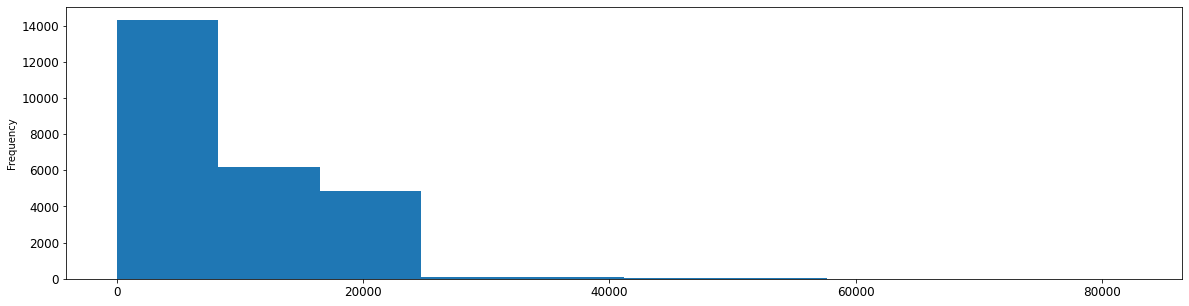

In [117]:
# Weight Distribution is OK
print(data['Weight (kg)'].describe())
data['Weight (kg)'].plot.hist(figsize = [20, 5], fontsize = 12)

count                         25692
mean      4 days 18:10:44.588977113
std      27 days 12:49:04.814243418
min            -4379 days +20:14:00
25%                 2 days 07:51:30
50%                 4 days 07:18:00
75%                 7 days 12:11:00
max                53 days 10:13:00
Name: Total Duration, dtype: object


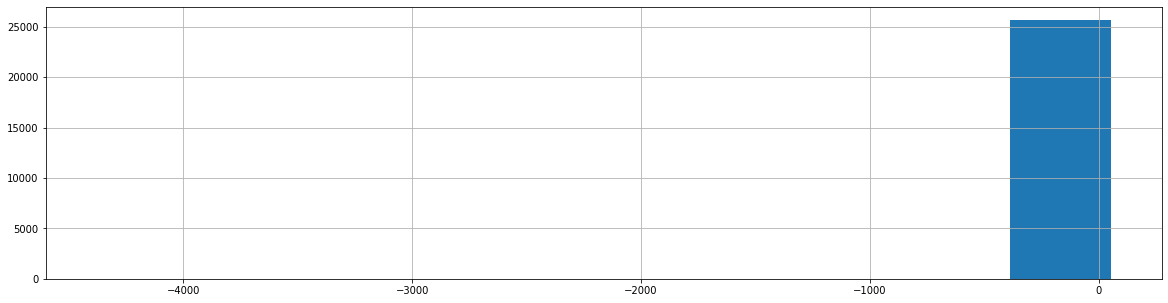

In [118]:
# Total Duration between Tender Date (PO) and Required Delivery Date (RDD) is not OK
data['Total Duration'] = data['Last Drop Original Plan Date Start'] - data['Tender Date']
print(data['Total Duration'].describe())
data['Total Duration'].dt.days.hist(figsize = [20, 5])

In [119]:
data[data['Total Duration']<'-4000 days']

,Tender Date,First Pick Calculated Date,First Pick Location City,Last Drop Calculated Date,Last Drop Location Name,Last Drop Location City,Last Drop State/Province,Weight (kg),Number of Shipments,Pallets,Equipment Description,Temperature Class,Transportation Mode,Last Drop Original Plan Date Start,Density (pcf),Volume (cu ft),Total Duration
Lean ID,,,,,,,,,,,,,,,,,
116428590,2020-10-22 11:46:00,2020-10-27 07:00:00,BOLTON,2020-10-27 07:44:00,LAKE CITY FOODS,MISSISSAUGA,ON,18119.501381,1.0,16.0,53 REEFER-TL,REFRIGERATED,TL,2008-10-27 08:00:00,41.3437,966.21,-4379 days +20:14:00


In [120]:
# Correct minimum value and re-calculate Total Duration
data['Last Drop Original Plan Date Start'] = data['Last Drop Original Plan Date Start'].replace(data['Last Drop Original Plan Date Start'].min(),'2020-10-27 08:00:00')
data['Total Duration'] = data['Last Drop Original Plan Date Start'] - data['Tender Date']

count                        25692
mean     3 days 12:44:48.451658103
std      5 days 23:15:19.049194692
min            -363 days +18:03:00
25%                0 days 01:30:00
50%                1 days 22:00:00
75%                6 days 16:36:45
max              370 days 10:00:00
Name: Calculated Duration, dtype: object


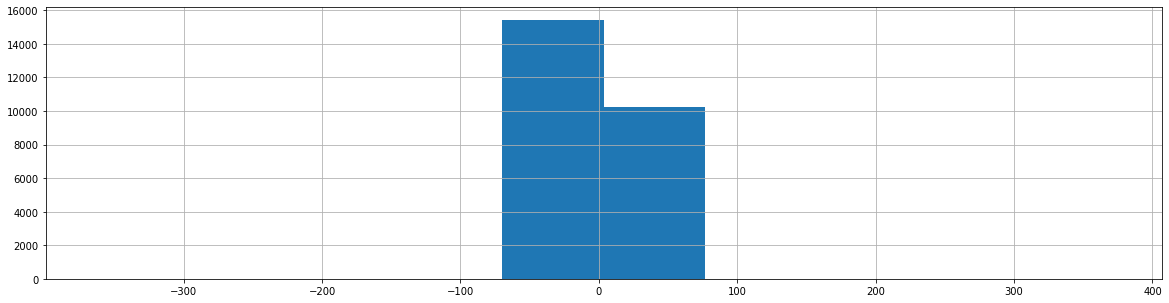

In [121]:
# Calculated Duration between First Pick and Last Drop is not OK either
data['Calculated Duration'] = data['Last Drop Calculated Date'] - data['First Pick Calculated Date']
print(data['Calculated Duration'].describe())
data['Calculated Duration'].dt.days.hist(figsize = [20, 5])

In [122]:
data[data['Calculated Duration']<'-300 days']

,Tender Date,First Pick Calculated Date,First Pick Location City,Last Drop Calculated Date,Last Drop Location Name,Last Drop Location City,Last Drop State/Province,Weight (kg),Number of Shipments,Pallets,Equipment Description,Temperature Class,Transportation Mode,Last Drop Original Plan Date Start,Density (pcf),Volume (cu ft),Total Duration,Calculated Duration
Lean ID,,,,,,,,,,,,,,,,,,
93363776,2019-05-02 14:48:00,2020-05-03 12:01:00,BOLTON,2019-05-07 06:04:00,SOBEYS STELLARTON,STELLARTON,NS,6926.736966,1.0,17.06,53 REEFER-LTL,REFRIGERATED,LTL,2019-05-07,19.1597,797.03,4 days 09:12:00,-363 days +18:03:00
101586353,2019-11-13 12:06:00,2020-11-14 12:36:00,BOLTON,2019-11-21 01:00:00,COSTCO DEPOT AIRDRIE 1034,AIRDRIE,AB,17395.540695,1.0,36.00,40 DRY CONTAINER,DRY,IM,2019-11-21,21.0362,1823.08,7 days 11:54:00,-360 days +12:24:00
118693035,2020-12-11 11:54:00,2020-12-15 16:15:00,BOLTON,2020-01-04 18:30:00,DOLLARAMA LP,MONT-ROYAL,QC,7294.391750,1.0,32.33,53 DRY-TL,DRY,TL,2020-12-15,9.7804,1644.25,3 days 12:06:00,-346 days +02:15:00


In [123]:
# Easy Fix, add 1 year to Last Drop Original Plan Date Start and Last Drop Original Plan Date Start, repeat if required
data['Last Drop Calculated Date'] = data['Last Drop Calculated Date'].replace(data['Last Drop Calculated Date'].min(),'2020-05-07 00:00:00')
data['Last Drop Original Plan Date Start'] = data['Last Drop Original Plan Date Start'].replace(data['Last Drop Original Plan Date Start'].min(),'2020-05-07 00:00:00')
data['Calculated Duration'] = data['Last Drop Calculated Date'] - data['First Pick Calculated Date']

In [129]:
# Check how many rows of data per State/Province
data['Last Drop State/Province'].value_counts().to_frame().transpose()

,ON,AB,QC,BC,NB,SK,MB,NS,NL,AUK,CAN,VIC,YT,NT,13,PA,IL
Last Drop State/Province,10450,5239,3667,2320,806,755,739,723,432,342,146,53,7,5,3,3,2


In [125]:
# Create a Dataframe from 4 Western Provinces
west_data = data[data['Last Drop State/Province'].isin(['BC', 'AB', 'SK','MB'])]

In [126]:
# Unique Western Cities
print(len(west_data['Last Drop Location City'].unique()))
west_data['Last Drop Location City'].value_counts().to_frame()

57


,Last Drop Location City
ROCKY VIEW COUNTY,1786
CALGARY,1627
WINNIPEG,737
EDMONTON,618
LANGLEY,584
AIRDRIE,525
REGINA,525
DELTA,418
VANCOUVER,263
SURREY,246


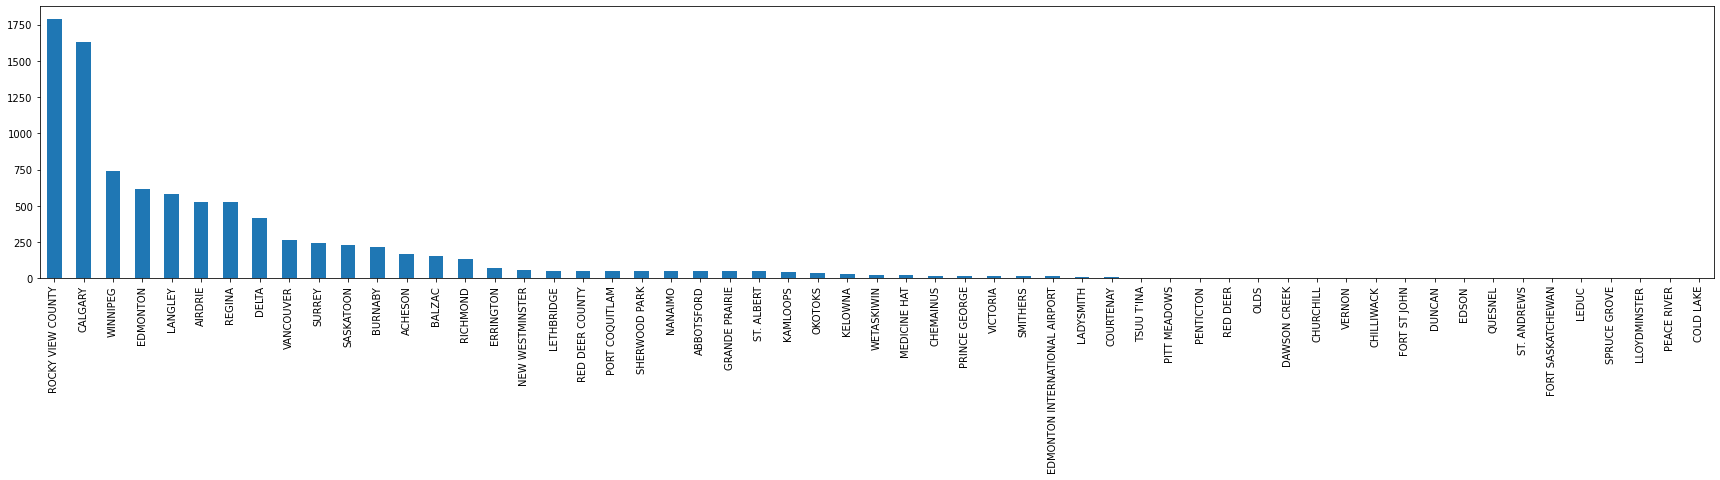

In [127]:
west_data['Last Drop Location City'].value_counts().plot.bar(figsize = [30, 5], fontsize = 10)

In [130]:
west_data[['Last Drop Location City', 'Last Drop State/Province', 'Total Duration']].groupby(by=['Last Drop State/Province','Last Drop Location City']).mean()

Total Duration
Last Drop State/Province Last Drop Location City                                  
AB                       ACHESON                         9 days 03:05:59.277108433
                         AIRDRIE                         9 days 03:26:55.428571428
                         BALZAC                          8 days 05:23:17.254901960
                         CALGARY                         7 days 17:56:07.818070067
                         COLD LAKE                                 7 days 11:14:00
                         EDMONTON                        8 days 12:43:09.805825242
                         EDMONTON INTERNATIONAL AIRPORT  8 days 19:39:25.714285714
                         EDSON                                     7 days 11:17:00
                         FORT SASKATCHEWAN                         7 days 11:11:00
                         GRANDE PRAIRIE                            8 days 12:32:10
                         LEDUC                                     7 days 11:10:00
                         LETHBRIDGE                      8 days 13:56:19.245283018
                         LLOYDMINSTER                              7 days 11:15:00
                         MEDICINE HAT                    8 days 10:16:54.285714285
                         OKOTOKS                                   8 days 13:17:27
                         OLDS                                      7 days 11:12:00
                         PEACE RIVER                               7 days 11:12:00
                         RED DEER                                  7 days 11:22:00
                         RED DEER COUNTY                 8 days 13:56:57.692307692
                         ROCKY VIEW COUNTY               6 days 18:05:46.461366181
                         SHERWOOD PARK                   8 days 14:00:01.153846153
                         SPRUCE GROVE                              7 days 11:14:00
                         ST. ALBERT                      8 days 13:09:39.574468085
                         TSUU T'INA                                7 days 15:31:12
                         WETASKIWIN                      8 days 12:22:40.909090909
BC                       ABBOTSFORD                     10 days 06:28:06.122448979
                         BURNABY                         9 days 22:40:57.488372093
                         CHEMAINUS                                10 days 10:26:00
                         CHILLIWACK                                8 days 10:37:00
                         COURTENAY                                10 days 14:36:00
                         DAWSON CREEK                              9 days 11:08:00
                         DELTA                           9 days 12:04:38.468899521
                         DUNCAN                                    9 days 11:05:00
                         ERRINGTON                      10 days 16:27:43.561643835
                         FORT ST JOHN                              9 days 11:01:00
                         KAMLOOPS                       10 days 04:21:13.043478260
                         KELOWNA                        10 days 03:41:03.636363636
                         LADYSMITH                                10 days 17:12:15
                         LANGLEY                         9 days 00:43:28.561643835
                         NANAIMO                        11 days 01:58:15.918367347
                         NEW WESTMINSTER                 9 days 10:00:07.241379310
                         PENTICTON                                 8 days 09:27:00
                         PITT MEADOWS                              9 days 17:52:15
                         PORT COQUITLAM                 10 days 03:58:53.076923076
                         PRINCE GEORGE                   9 days 15:49:42.352941176
                         QUESNEL                                   8 days 10:37:00
                         RICHMOND                        9 days 22:36:03.582089552
 

In [131]:
# Transportation Modes Counts
west_data['Transportation Mode'].value_counts().to_frame().transpose()

,LTL,IM,TL
Transportation Mode,6177,1874,1002


In [132]:
# Transportation Equipment Usage
west_data[['Transportation Mode','Temperature Class', 'Equipment Description']].groupby(by=['Transportation Mode','Temperature Class','Equipment Description']).count()

Empty DataFrame
Columns: []
Index: [(IM, DRY, 40 DRY CONTAINER), (IM, DRY, 53 DRY-IM), (IM, HEAT, 53 HEATED-IM), (IM, REFRIGERATED, 53 REEFER-IM), (LTL, DRY, 53 DRY - LTL IM), (LTL, DRY, 53 DRY-LTL), (LTL, DRY, 53 REEFER - LTL IM), (LTL, HEAT, 53 HEATED - LTL IM), (LTL, HEAT, 53 HEATED-LTL), (LTL, REFRIGERATED, 53 REEFER - LTL IM), (LTL, REFRIGERATED, 53 REEFER-LTL), (TL, DRY, 53 DRY-TL), (TL, HEAT, 53 HEATED-TL), (TL, REFRIGERATED, 53 REEFER-TL)]

count    9053.000000
mean       15.355377
std        15.363571
min         0.010000
25%         1.410000
50%         9.010000
75%        29.850000
max        53.940000
Name: Pallets, dtype: float64


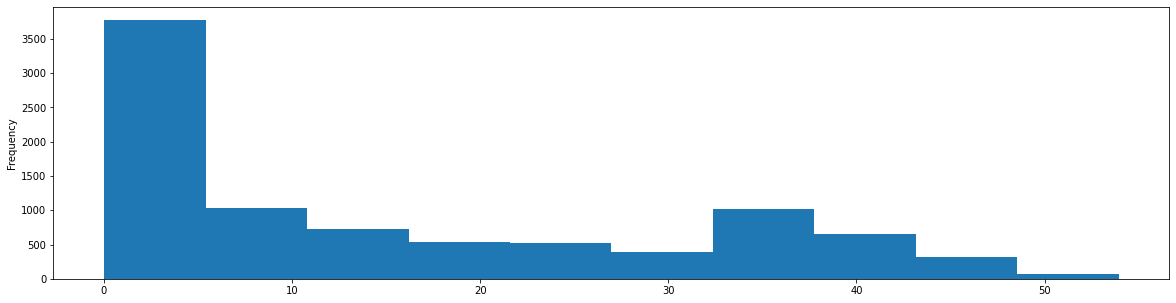

In [133]:
# Distribution of Pallets is OK
print(west_data['Pallets'].describe())
west_data['Pallets'].plot.hist(figsize = [20, 5])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


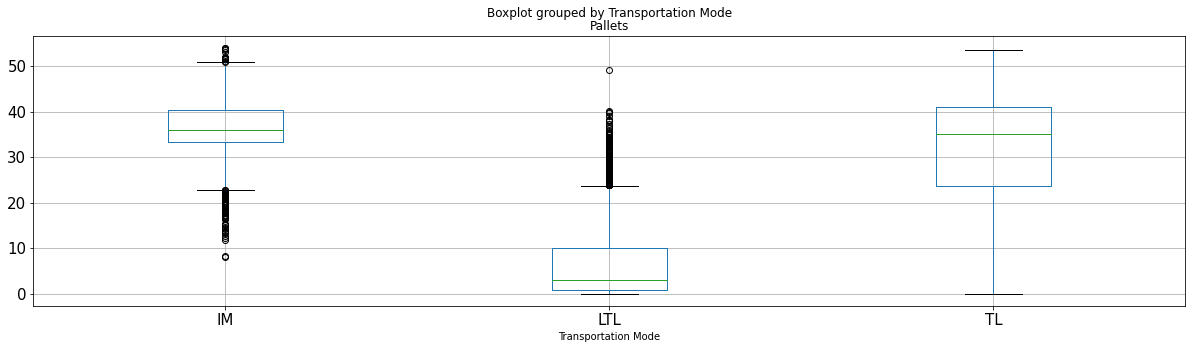

In [134]:
# Pallets by Transportation Mode
west_data.boxplot('Pallets','Transportation Mode', figsize = [20, 5], fontsize = 15)

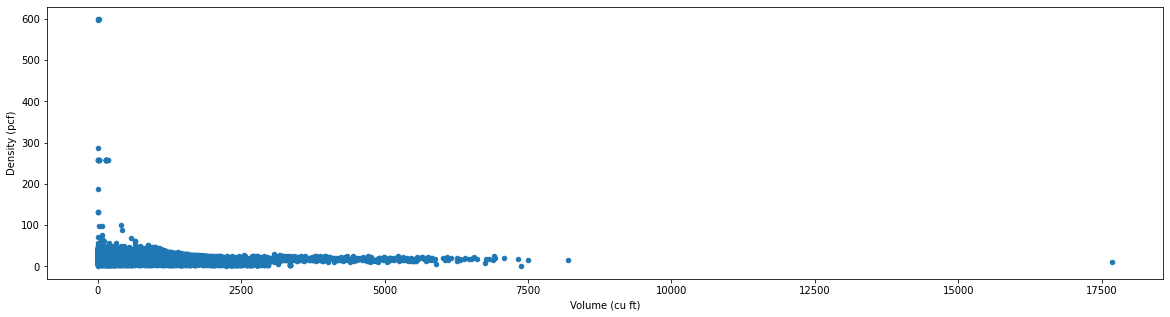

In [135]:
data.plot.scatter('Volume (cu ft)','Density (pcf)', figsize = [20, 5])

count    9053.000000
mean       19.556712
std        11.864149
min         2.866200
25%        15.674000
50%        19.693300
75%        22.631200
max       598.672200
Name: Density (pcf), dtype: float64


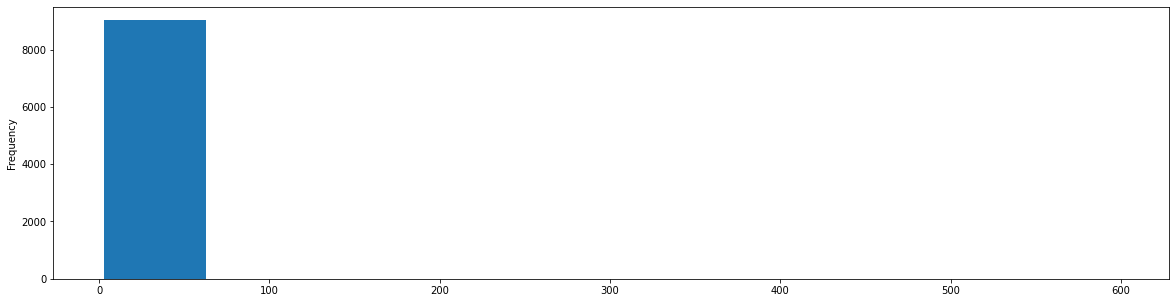

In [136]:
# Density Distribution doesn't look right
print(west_data['Density (pcf)'].describe())
west_data['Density (pcf)'].plot.hist(figsize = [20, 5])

In [137]:
# Why so heavy?
west_data[west_data['Density (pcf)']>500]

,Tender Date,First Pick Calculated Date,First Pick Location City,Last Drop Calculated Date,Last Drop Location Name,Last Drop Location City,Last Drop State/Province,Weight (kg),Number of Shipments,Pallets,Equipment Description,Temperature Class,Transportation Mode,Last Drop Original Plan Date Start,Density (pcf),Volume (cu ft),Total Duration,Calculated Duration
Lean ID,,,,,,,,,,,,,,,,,,
108596856,2020-04-30 11:34:00,2020-05-01 10:40:00,BOLTON,2020-05-08 10:00:00,WALMART LOGISTICS 6063,CALGARY,AB,2128.976753,2.0,7.4,53 REEFER-LTL,REFRIGERATED,LTL,2020-05-08,598.6722,7.84,7 days 12:26:00,6 days 23:20:00


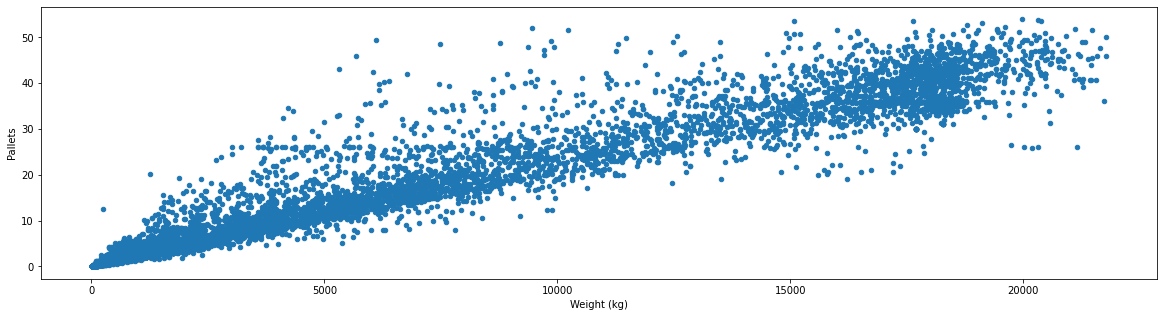

In [138]:
# Correlation between Weight and Pallets is OK
west_data.plot.scatter('Weight (kg)','Pallets', figsize = [20, 5])

## West LTL Data Load Consolidaton

In [140]:
# Reduce the dataset to LTL data only 

west_LTL_data = west_data[west_data['Transportation Mode']=='LTL']

month = 11 # November only
west_LTL_data = west_LTL_data[west_LTL_data['Last Drop Original Plan Date Start'].dt.month>=month]

# Drop unnecessary columns 
west_LTL_data = west_LTL_data.drop(columns=['First Pick Location City','Number of Shipments','Transportation Mode','Equipment Description'])

# Rename remaining columns
west_LTL_data = west_LTL_data.rename(columns={'Last Drop Location Name':'Final Destination','First Pick Calculated Date':'Plan Pick Date','Last Drop Calculated Date':'Plan Drop Date','Last Drop Original Plan Date Start':'RDD', 'Tender Date':'Order Date', 'Last Drop Location City':'Destination City','Last Drop State/Province':'Destination Province'})

# Reorder and Re-index the columns
west_LTL_data = west_LTL_data.reindex(columns=['Order Date','RDD','Total Duration','Plan Pick Date','Plan Drop Date','Calculated Duration','Final Destination','Destination City','Destination Province','Temperature Class','Pallets','Weight (kg)','Volume (cu ft)','Density (pcf)'])

west_LTL_data

,Order Date,RDD,Total Duration,Plan Pick Date,Plan Drop Date,Calculated Duration,Final Destination,Destination City,Destination Province,Temperature Class,Pallets,Weight (kg),Volume (cu ft),Density (pcf)
Lean ID,,,,,,,,,,,,,,
116377810,2020-10-21 14:42:00,2020-11-02 00:00:00,11 days 09:18:00,2020-10-22 16:30:00,2020-11-01 21:30:00,10 days 05:00:00,OVERWAITEA FOOD GROUP,LANGLEY,BC,DRY,15.26,5981.005883,710.26,18.5648
116430664,2020-10-22 12:08:00,2020-11-01 00:00:00,9 days 11:52:00,2020-10-23 17:15:00,2020-10-31 19:53:00,8 days 02:38:00,OVERWAITEA FOOD GROUP,LANGLEY,BC,REFRIGERATED,27.35,11443.242675,1297.30,19.4466
116490708,2020-10-23 12:13:00,2020-11-02 00:00:00,9 days 11:47:00,2020-10-24 18:30:00,2020-11-02 14:30:00,8 days 20:00:00,WALLACE & CAREY LIMITED,NEW WESTMINSTER,BC,DRY,6.01,2674.339967,338.88,17.3982
116490657,2020-10-23 12:13:00,2020-11-03 00:00:00,10 days 11:47:00,2020-10-25 12:10:00,2020-11-03 07:00:00,8 days 18:50:00,Q F CASECO,ERRINGTON,BC,REFRIGERATED,4.91,1988.707839,228.27,19.2069
116409139,2020-10-22 08:58:00,2020-11-03 00:00:00,11 days 15:02:00,2020-10-26 10:57:00,2020-11-04 09:00:00,8 days 22:03:00,BUY-LOW FOODS LIMITED,SURREY,BC,DRY,1.06,443.454610,48.62,20.1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119153606,2020-12-22 13:17:00,2020-12-31 00:00:00,8 days 10:43:00,2020-12-23 19:30:00,2021-01-05 14:00:00,12 days 18:30:00,SOBEYS WEST,ROCKY VIEW COUNTY,AB,HEAT,4.44,2250.775384,233.03,21.2939
119144785,2020-12-22 11:30:00,2020-12-23 21:00:00,1 days 09:30:00,2020-12-23 20:00:00,2020-12-23 21:00:00,0 days 01:00:00,SOBEYS WEST RSC 0050,ROCKY VIEW COUNTY,AB,HEAT,8.17,3797.012909,339.04,24.6902
119153172,2020-12-22 13:10:00,2020-12-31 00:00:00,8 days 10:50:00,2020-12-23 20:30:00,2021-01-02 08:00:00,9 days 11:30:00,"AMAZON.COM.CA, INC. YEG1",EDMONTON,AB,DRY,2.96,1344.416122,113.20,26.1831


count                            962
mean     -2 days +19:28:13.035343036
std        2 days 18:17:21.129261861
min               -31 days +17:30:00
25%                -2 days +17:46:30
50%                -1 days +13:34:00
75%                -1 days +17:33:45
max                  5 days 12:00:00
Name: Slack, dtype: object


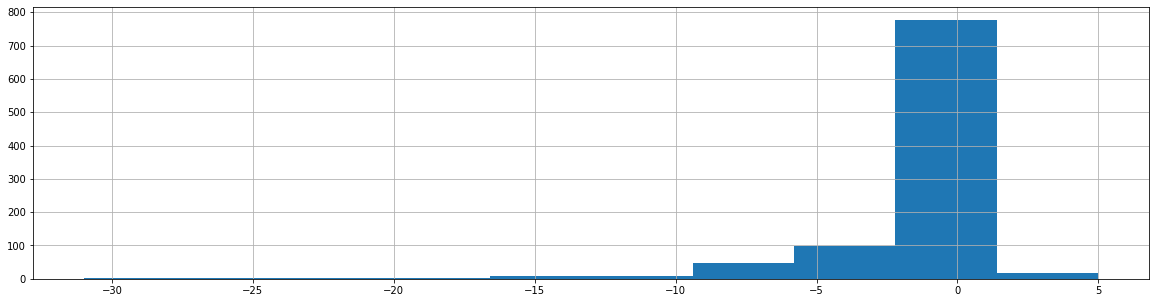

In [141]:
# Calculate Slack Time as RDD - Plan Drop Date
west_LTL_data['Slack'] = west_LTL_data['RDD'] - west_LTL_data['Plan Drop Date']
print(west_LTL_data['Slack'].describe())
west_LTL_data['Slack'].dt.days.hist(figsize = [20, 5])

In [142]:
# Show minimum value
west_LTL_data[west_LTL_data['Slack']==west_LTL_data['Slack'].min()]
  

,Order Date,RDD,Total Duration,Plan Pick Date,Plan Drop Date,Calculated Duration,Final Destination,Destination City,Destination Province,Temperature Class,Pallets,Weight (kg),Volume (cu ft),Density (pcf),Slack
Lean ID,,,,,,,,,,,,,,,
117521476,2020-11-16 11:36:00,2020-11-25,8 days 12:24:00,2020-11-17 13:35:00,2020-12-25 06:30:00,37 days 16:55:00,COSTCO WHOLESALE 258(EDMONTON),EDMONTON,AB,HEAT,0.36,152.561268,15.85,21.2202,-31 days +17:30:00


In [143]:
load_consolidation = west_LTL_data[['Destination Province','Destination City','Final Destination','Temperature Class', 'RDD','Slack','Pallets','Weight (kg)','Volume (cu ft)']].groupby(by=['Destination Province','Destination City','Final Destination','Temperature Class','RDD','Slack']).sum()
load_consolidation

Pallets  \
Destination Province Destination City Final Destination      Temperature Class RDD        Slack                        
AB                   ACHESON          OVERWAITEA FOOD GROUP  DRY               2020-11-10 -1 days +21:35:00     3.14   
                                                                               2020-11-17 0 days 06:15:00       4.17   
                                                                               2020-11-20 0 days 02:55:00       3.39   
                                                             HEAT              2020-11-26 0 days 05:15:00       2.07   
                                                                               2020-12-14 -1 days +23:10:00     2.63   
...                                                                                                              ...   
SK                   SASKATOON        FEDERATED COOP LIMITED HEAT              2020-12-22 -3 days +15:25:00     3.74   
                                                                               2020-12-29 -1 days +17:00:00     2.12   
                                                             REFRIGERATED      2020-12-03 -1 days +17:30:00    19.95   
                                                                               2020-12-10 -5 days +17:30:00     8.53   
                                                                               2020-12-24 1 days 17:30:00      19.19   

                                                                                                             Weight (kg)  \
Destination Province Destination City Final Destination      Temperature Class RDD        Slack                            
AB                   ACHESON          OVERWAITEA FOOD GROUP  DRY               2020-11-10 -1 days +21:35:00  1127.435662   
                                                                               2020-11-17 0 days 06:15:00    1606.438308   
                                                                               2020-11-20 0 days 02:55:00     636.122518   
                                                             HEAT              2020-11-26 0 days 05:15:00     789.418605   
                                                                               2020-12-14 -1 days +23:10:00   932.218565   
...                                                                                                                  ...   
SK                   SASKATOON        FEDERATED COOP LIMITED HEAT              2020-12-22 -3 days +15:25:00  1598.736309   
                                                                               2020-12-29 -1 days +17:00:00   765.754690   
                                                             REFRIGERATED      2020-12-03 -1 days +17:30:00  9073.104451   
                                                                               2020-12-10 -5 days +17:30:00  2743.272404   
                                                                               2020-12-24 1 days 17:30:00    7886.688170   

                                                                                                             Volume (cu ft)  
Destination Province Destination City Final Destination      Temperature Class RDD        Slack                              
AB                   ACHESON          OVERWAITEA FOOD GROUP  DRY               2020-11-10 -1 days +21:35:00          198.26  
                                                                               2020-11-17 0 days 06:15:00            257.11  
                                                                               2020-11-20 0 days 02:55:00            167.25  
                                                             HEAT              2020-11-26 0 days 05:15:00            127.84  
                                                                               2020-12-14 -1 days +23:10:00          194.57  
...                                                  

In [145]:
# Save the clean datasets to an Excel Spreadsheet
west_LTL_data.to_excel('3PL_MDD_Clean_West_LTL.xlsx', sheet_name='3PL')
load_consolidation.to_excel('3PL_West_LTL_Load_Consolidation.xlsx', sheet_name='Consolidation')
!cp 3PL_MDD_Clean_West_LTL_Data.xlsx "/content/drive/My Drive/Colab Data/"
!cp 3PL_West_LTL_Load_Consolidation.xlsx "/content/drive/My Drive/Colab Data/"

cp: cannot stat '3PL_MDD_Clean_West_LTL_Data.xlsx': No such file or directory


## Geolocation Data

In [199]:
# Install necessary Libraries, uncomment if required
!pip install geopandas
!pip install folium
import folium # map rendering library
from folium import plugins
import geopandas as gpd
from geopy.geocoders import Nominatim
from shapely.geometry import LineString, Point
import matplotlib.cm as cm
import matplotlib.colors as colors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [176]:
# Create a new Dataframe for Unique Cities
west_cities = west_LTL_data[['Destination Province','Destination City','Temperature Class']].groupby(['Destination Province','Destination City','Temperature Class']).count().reset_index()
west_cities

,Destination Province,Destination City,Temperature Class
0,AB,ACHESON,DRY
1,AB,ACHESON,HEAT
2,AB,ACHESON,REFRIGERATED
3,AB,AIRDRIE,DRY
4,AB,AIRDRIE,HEAT
...,...,...,...
77,SK,REGINA,HEAT
78,SK,REGINA,REFRIGERATED
79,SK,SASKATOON,DRY
80,SK,SASKATOON,HEAT


In [177]:
# Geo locate Cities
destinations = gpd.GeoDataFrame(columns = ['name', 'geometry'], crs = 4326, geometry = 'geometry')
geolocator = Nominatim(user_agent="Canada_explorer")
Lat = []
Lon = []

for i in range(len(west_cities)):
  location = geolocator.geocode(west_cities['Destination City'][i] + ', ' + west_cities['Destination Province'][i])
  print('The geograpical coordinate of {} is {}, {}.'.format(west_cities['Destination City'][i], location.latitude, location.longitude))
  destinations.at[i, 'geometry'] = Point(location.longitude, location.latitude)
  destinations.at[i, 'name'] = west_cities['Destination City'][i]
  Lat.append(location.latitude)
  Lon.append(location.longitude)

west_cities['Latitude'] = Lat
west_cities['Longitude'] = Lon

The geograpical coordinate of ACHESON is 53.5459141, -113.7715761.
The geograpical coordinate of ACHESON is 53.5459141, -113.7715761.
The geograpical coordinate of ACHESON is 53.5459141, -113.7715761.
The geograpical coordinate of AIRDRIE is 51.28597, -114.01062.
The geograpical coordinate of AIRDRIE is 51.28597, -114.01062.
The geograpical coordinate of AIRDRIE is 51.28597, -114.01062.
The geograpical coordinate of BALZAC is 51.2156111, -114.0045579.
The geograpical coordinate of BALZAC is 51.2156111, -114.0045579.
The geograpical coordinate of BALZAC is 51.2156111, -114.0045579.
The geograpical coordinate of CALGARY is 51.0460954, -114.065465.
The geograpical coordinate of CALGARY is 51.0460954, -114.065465.
The geograpical coordinate of CALGARY is 51.0460954, -114.065465.
The geograpical coordinate of EDMONTON is 53.535411, -113.507996.
The geograpical coordinate of EDMONTON is 53.535411, -113.507996.
The geograpical coordinate of EDMONTON is 53.535411, -113.507996.
The geograpical 

In [183]:
west_cities.transpose()

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
Destination Province,AB,AB,AB,AB,AB,AB,AB,AB,AB,AB,...,BC,MB,MB,MB,SK,SK,SK,SK,SK,SK
Destination City,ACHESON,ACHESON,ACHESON,AIRDRIE,AIRDRIE,AIRDRIE,BALZAC,BALZAC,BALZAC,CALGARY,...,VICTORIA,WINNIPEG,WINNIPEG,WINNIPEG,REGINA,REGINA,REGINA,SASKATOON,SASKATOON,SASKATOON
Temperature Class,DRY,HEAT,REFRIGERATED,DRY,HEAT,REFRIGERATED,DRY,HEAT,REFRIGERATED,DRY,...,HEAT,DRY,HEAT,REFRIGERATED,DRY,HEAT,REFRIGERATED,DRY,HEAT,REFRIGERATED
Latitude,53.545914,53.545914,53.545914,51.28597,51.28597,51.28597,51.215611,51.215611,51.215611,51.046095,...,48.428318,49.895537,49.895537,49.895537,50.44876,50.44876,50.44876,52.131802,52.131802,52.131802
Longitude,-113.771576,-113.771576,-113.771576,-114.01062,-114.01062,-114.01062,-114.004558,-114.004558,-114.004558,-114.065465,...,-123.364953,-97.138458,-97.138458,-97.138458,-104.61731,-104.61731,-104.61731,-106.660767,-106.660767,-106.660767


In [184]:
# create a Canada map using latitude and longitude values from destinations
map_canada = folium.Map(location=[54, -110], zoom_start=6)

# add markers to map
for lat, lon, City in zip(west_cities['Latitude'], west_cities['Longitude'], west_cities['Destination City']):
    label = '{}'.format(City)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=1,
        popup=label,
        color='blue',
        fill=False,
        fill_opacity = 0.2,
        parse_html=False).add_to(map_canada)  
 
map_canada

## Cluster Locations by Geographical Region

In [214]:
# one hot encoding of the Temperature Class with Dummy Columns
temp_location = pd.get_dummies(west_cities[['Temperature Class']], prefix="", prefix_sep="")

# add back the Locatation Coordinates
temp_location['Latitude'] = west_cities['Latitude']
temp_location['Longitude'] = west_cities['Longitude']
print(temp_location.shape)
temp_location.head()

(82, 5)


,DRY,HEAT,REFRIGERATED,Latitude,Longitude
0,1,0,0,53.545914,-113.771576
1,0,1,0,53.545914,-113.771576
2,0,0,1,53.545914,-113.771576
3,1,0,0,51.285970,-114.010620
4,0,1,0,51.285970,-114.010620


In [215]:
# set number of clusters
kclusters = 8

# run k-means clustering
kmeans = KMeans(init = "k-means++", n_clusters=kclusters, random_state=123).fit(temp_location)

# check how many cluster labels were generated for each row in the dataframe
print(len(kmeans.labels_))

# add Region labels
temp_location.insert(0, 'Region', kmeans.labels_)
temp_location.head()

82


,Region,DRY,HEAT,REFRIGERATED,Latitude,Longitude
0,1,1,0,0,53.545914,-113.771576
1,1,0,1,0,53.545914,-113.771576
2,1,0,0,1,53.545914,-113.771576
3,6,1,0,0,51.285970,-114.010620
4,6,0,1,0,51.285970,-114.010620


In [216]:
# Add back the Destination City and Province
temp_location['Destination City'] = west_cities['Destination City']
temp_location['Destination Province'] = west_cities['Destination Province']

# move Destination City and Province to the first columns
fixed_columns = [temp_location.columns[-1]] + list(temp_location.columns[:-1])
temp_location = temp_location[fixed_columns]
fixed_columns = [temp_location.columns[-1]] + list(temp_location.columns[:-1])
temp_location = temp_location[fixed_columns]
temp_location

,Destination City,Destination Province,Region,DRY,HEAT,REFRIGERATED,Latitude,Longitude
0,ACHESON,AB,1,1,0,0,53.545914,-113.771576
1,ACHESON,AB,1,0,1,0,53.545914,-113.771576
2,ACHESON,AB,1,0,0,1,53.545914,-113.771576
3,AIRDRIE,AB,6,1,0,0,51.285970,-114.010620
4,AIRDRIE,AB,6,0,1,0,51.285970,-114.010620
...,...,...,...,...,...,...,...,...
77,REGINA,SK,3,0,1,0,50.448760,-104.617310
78,REGINA,SK,3,0,0,1,50.448760,-104.617310
79,SASKATOON,SK,3,1,0,0,52.131802,-106.660767
80,SASKATOON,SK,3,0,1,0,52.131802,-106.660767


In [220]:
# create map
map_region = folium.Map(location=[54, -110], zoom_start=6)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, city, region in zip(temp_location['Latitude'], temp_location['Longitude'],temp_location['Destination City'],temp_location['Region']):
    label = folium.Popup(str(city) + ' Region ' + str(region), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[region-1],
        fill=True,
        fill_color=rainbow[region-1],
        fill_opacity=0.7).add_to(map_region)
       
map_region